# Lab 2 - Quantum States, SOLUTIONS
Useful for working examples and problems with photon quantum states. You may notice some similarity to the Jones Calculus ;-)

In [10]:
import numpy as np
from qutip import *

These are the polarization states:

In [11]:
H = Qobj([[1],[0]])
V = Qobj([[0],[1]])
P45 = Qobj([[1/np.sqrt(2)],[1/np.sqrt(2)]])
M45 = Qobj([[1/np.sqrt(2)],[-1/np.sqrt(2)]])
R = Qobj([[1/np.sqrt(2)],[-1j/np.sqrt(2)]])
L = Qobj([[1/np.sqrt(2)],[1j/np.sqrt(2)]])

In [12]:
V

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [17]:
Hbra*V

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [16]:
Hbra = H.dag()

Devices:

HWP - Half-wave plate axis at $\theta$ to the horizontal

LP - Linear polarizer, axis at $\theta$

QWP - Quarter-wave plate, axis at $\theta$

Note, these are functions so you need to call them with a specific value of theta.

In [18]:
def HWP(theta):
    return Qobj([[np.cos(2*theta),np.sin(2*theta)],[np.sin(2*theta),-np.cos(2*theta)]]).tidyup()

In [19]:
def LP(theta):
    return Qobj([[np.cos(theta)**2,np.cos(theta)*np.sin(theta)],[np.sin(theta)*np.cos(theta),np.sin(theta)**2]]).tidyup()

In [20]:
def QWP(theta):
    return Qobj([[np.cos(theta)**2 + 1j*np.sin(theta)**2,
                 (1-1j)*np.sin(theta)*np.cos(theta)],
                [(1-1j)*np.sin(theta)*np.cos(theta),
                 np.sin(theta)**2 + 1j*np.cos(theta)**2]]).tidyup()

In [22]:
QWP(np.pi/4)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]

## Example 1) Check that the $|H\rangle$ state is normalized

In [23]:
H.dag()*H

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

To show more information on an object, use the question mark after the function or object:

In [25]:
np.sin?

### Example 2) Converting from ket to bra:

In [26]:
psi = Qobj([[1+1j],[2-1j]])
psi

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.+1.j]
 [2.-1.j]]

In [27]:
psi.dag()

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1.-1.j 2.+1.j]]

In [17]:
psi.dag().dag()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.+1.j]
 [2.-1.j]]

the `.dag()` python method computes the "daggar" or the complex transpose.

## 1) Is `psi` normalized? If not, find the normalization constant and confirm that constant normalizes `psi`.

In [28]:
psi.dag()*psi

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[7.]]

In [29]:
psi_norm = psi*np.sqrt(1/7)

In [30]:
psi_norm.dag() * psi_norm

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

## 2) Verify that the $|V\rangle$ state is normalized

In [31]:
V.dag()*V

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

## 3) Verify that the $|H\rangle$ and $|V\rangle$ states are orthogonal. Repeat for the other pairs of states.

In [32]:
H.dag()*V

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [33]:
L.dag()*R

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [34]:
P45.dag()*M45

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

## 4) Calculate the horizontal component $c_H$ of the state $\psi = \frac{1}{\sqrt{5}}|H\rangle + \frac{2}{\sqrt{5}}|V\rangle$

In [35]:
psi = 1/np.sqrt(5)*H + 2/np.sqrt(5)*V
psi

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.4472136 ]
 [0.89442719]]

In [55]:
psi2 = Qobj([[1/np.sqrt(5)],[2/np.sqrt(5)]])
psi2

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.4472136 ]
 [0.89442719]]

In [57]:
H.dag()*psi

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.4472136]]

## 5) Verify Eq. (3.18), $P(H||45\rangle)=\frac{1}{2},$ (which states "The probability that a photon prepared in the +45 state will leave a PA_HV in the Horizontal state is one half.")

In [38]:
(H.dag()*P45).norm()**2

0.4999999999999999

In [49]:
np.conjugate(H.dag()*P45) * (H.dag()*P45)

array([[0.5+0.j]])

## 6) Demonstrate that a half-wave plate at 45-degrees converts $|H\rangle$ to $|V\rangle$

In [58]:
HWP(np.radians(45)) * H

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [60]:
HWP(np.pi/4) * H == V

True

## 7) Re-create Figure 3.9 by plotting the probability P(+45) vs phase φ

In [61]:
import matplotlib.pyplot as plt

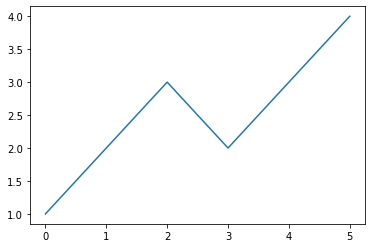

In [62]:
plt.plot([1,2,3,2,3,4])

In [89]:
phi_list = np.linspace(0,8*np.pi,num=100)

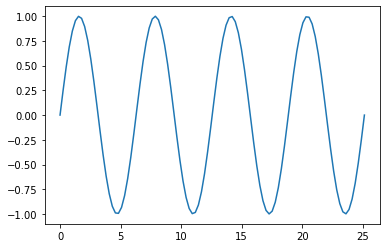

In [85]:
plt.plot(phi,np.sin(phi))

In [87]:
sin_list = [np.sin(p) for p in phi] # notes 

add text 

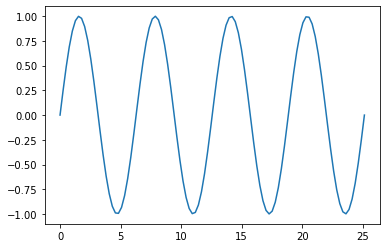

In [88]:
plt.plot(phi,sin_list)

In [101]:
def psi(phi):
    return 1/np.sqrt(2)*(H + np.exp(1j*phi)*V)

In [102]:
answer = [(M45.dag()*psi(phi)).norm()**2 for phi in phi_list]

Text(0, 0.5, 'P(-45)')

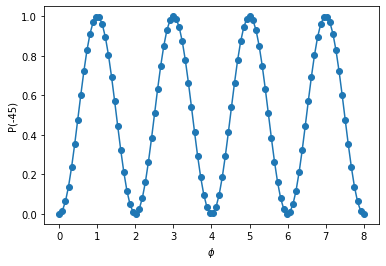

In [107]:
plt.plot(phi_list/np.pi,answer,"-o")
plt.xlabel("$\phi$")
plt.ylabel("P(-45)")